In [105]:
from __future__ import division
import jedi.jedi as jedi
from jedi.utils import plot, init_tools
import cPickle
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [106]:
noiseless = cPickle.load(open("../data/randompickles/noiseless_errors.p", "rb"))
noise = cPickle.load(open("../data/randompickles/noise_errors.p", "rb"))

In [107]:
noise.keys()

[0.25, 0.2, 0.05, 0.15, 0.3, 0.1]

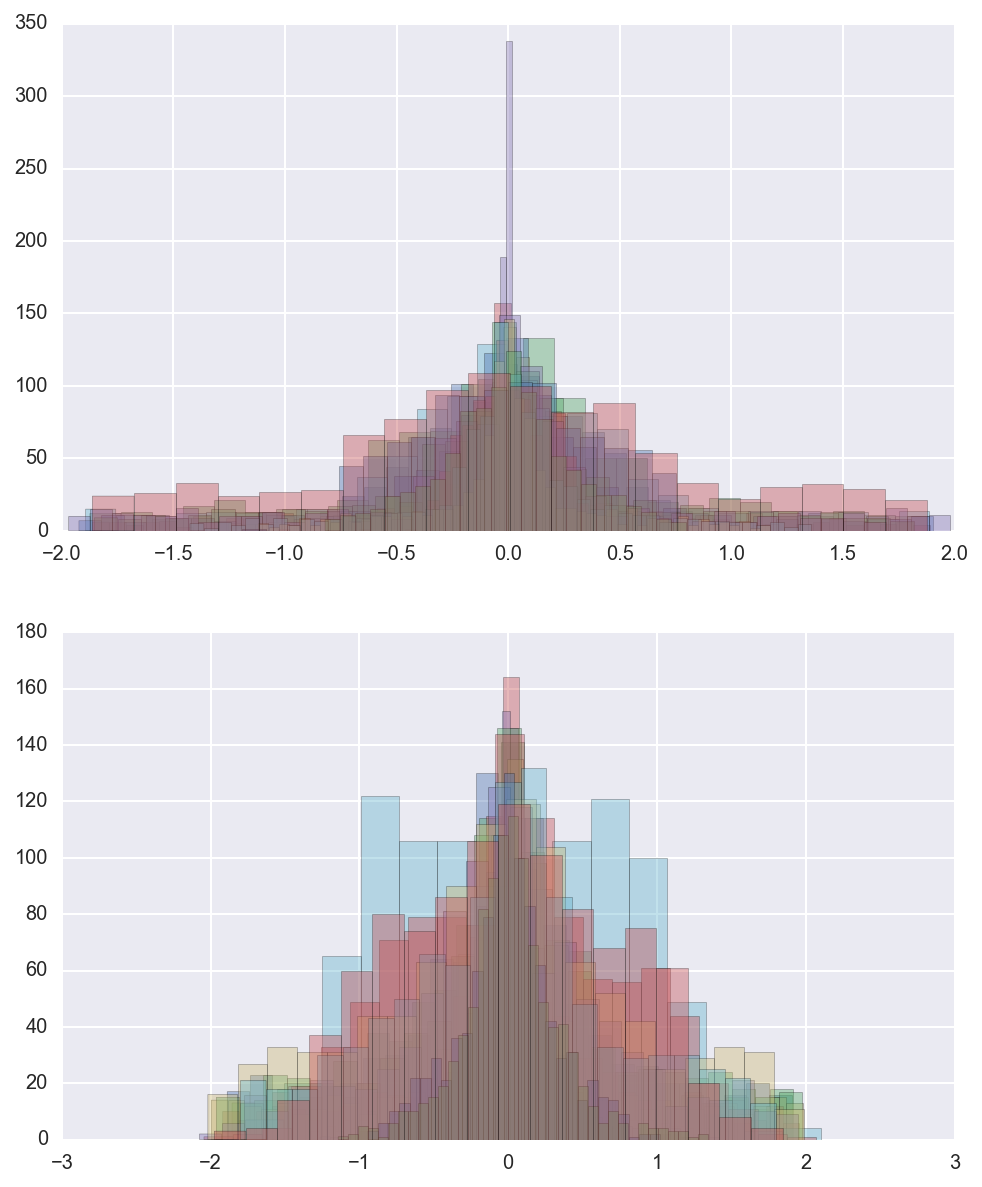

In [92]:
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
for errors in noiseless['force'][0]:
    sns.distplot(errors, kde=False)
plt.subplot(2,1,2)
for errors in noiseless['dforce'][0]:
    sns.distplot(errors, kde=False)

In [103]:
print "Noiseless --"
print"FORCE: %.4f"% (np.var(noiseless['force'][0]))
print"DFORCE: %.4f"% (np.var(noiseless['dforce'][0]))

Noiseless --
FORCE: 0.2998
DFORCE: 0.4574


In [97]:
level = .2

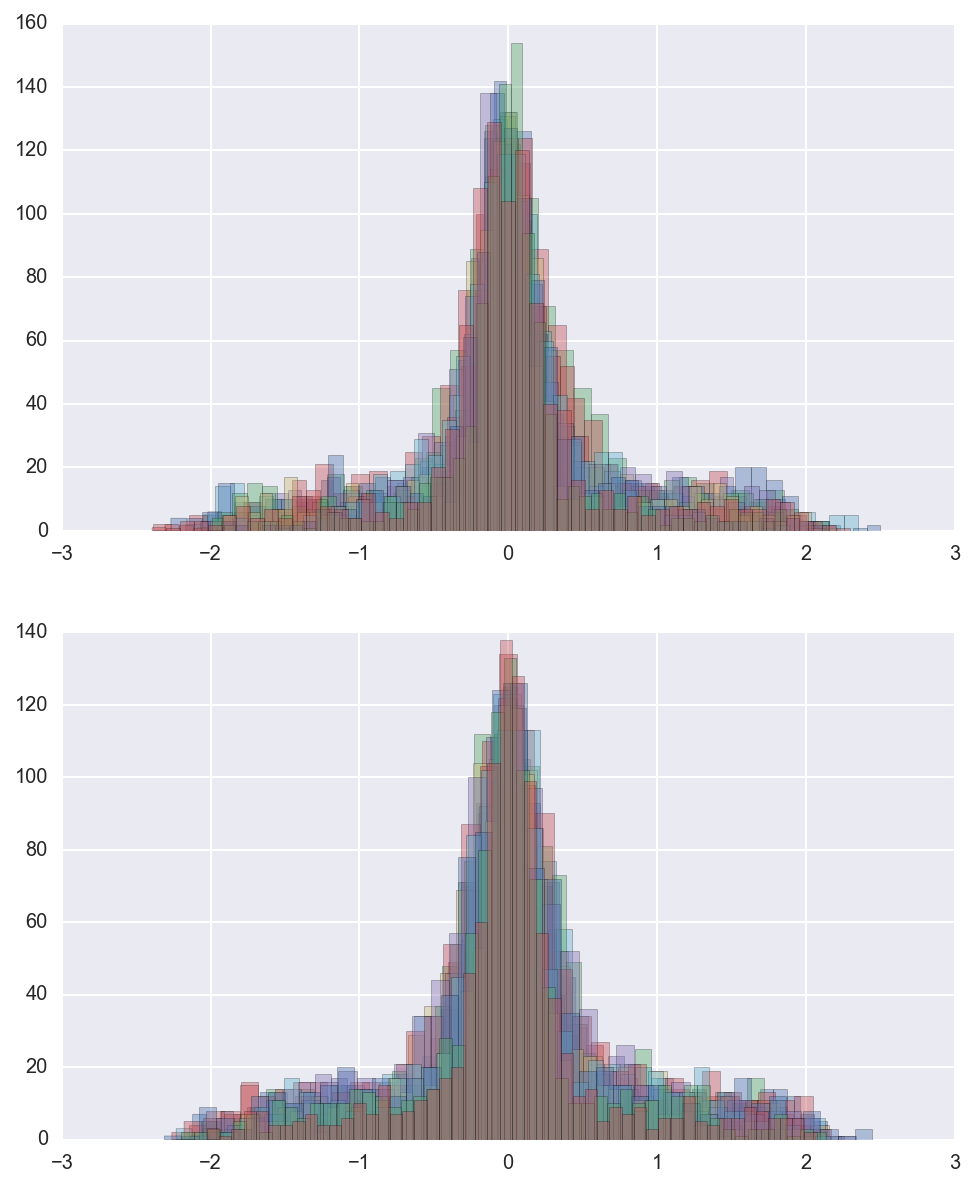

In [98]:
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
for errors in noise[level]['force'][0]:
    sns.distplot(errors, kde=False)
plt.subplot(2,1,2)
for errors in noise[level]['dforce'][0]:
    sns.distplot(errors, kde=False)

In [108]:
dns = []
fns = []

print "Gaussian Noise --\n"
for level in sorted(noise.keys()):
    print "Variance: %.2f" % level
    print"FORCE: %.4f"% (np.var(noise[level]['force'][0]))
    print"DFORCE: %.4f\n"% (np.var(noise[level]['dforce'][0]))
    dns.append(np.var(noise[level]['dforce'][0]))
    fns.append(np.var(noise[level]['force'][0]))

Gaussian Noise --

Variance: 0.05
FORCE: 0.1648
DFORCE: 0.1029

Variance: 0.10
FORCE: 0.2019
DFORCE: 0.1289

Variance: 0.15
FORCE: 0.2832
DFORCE: 0.2247

Variance: 0.20
FORCE: 0.4137
DFORCE: 0.3934

Variance: 0.25
FORCE: 0.4146
DFORCE: 0.3355

Variance: 0.30
FORCE: 0.4698
DFORCE: 0.4615



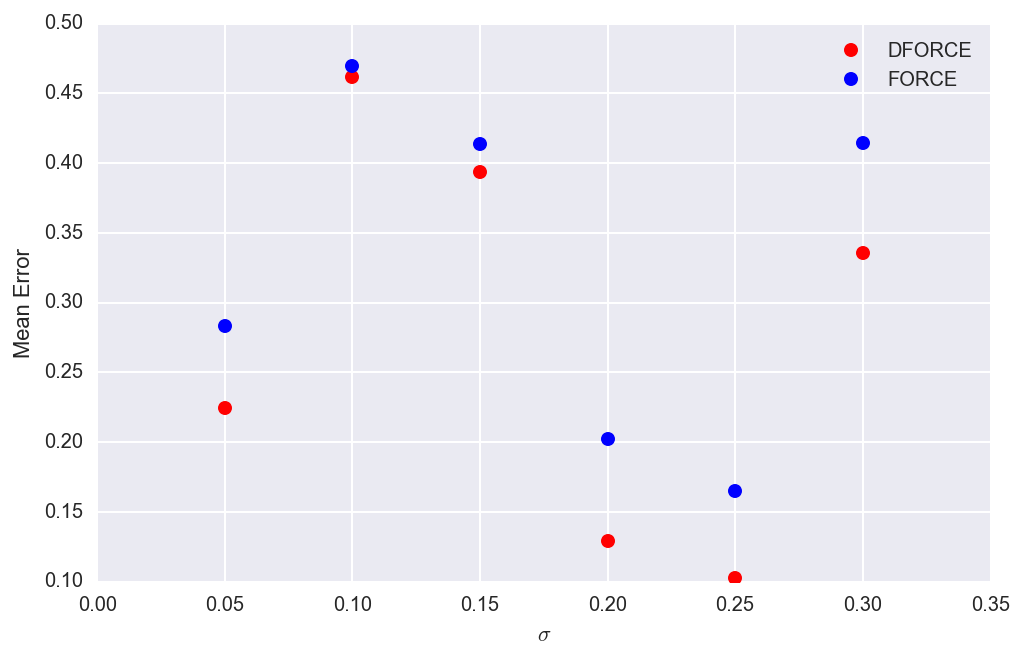

In [116]:
plt.figure(figsize=(8,5))
plt.plot(noise.keys(), dns, 'ro', label='DFORCE');
plt.plot(noise.keys(), fns, 'bo', label='FORCE');
plt.xlim(0,.35);
plt.xlabel("$\sigma$");
plt.ylabel("Mean Error");
plt.legend();